In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/cleaned.csv")

In [3]:
V = df['vote_count']
C = df['vote_average'].mean()
R = df['vote_average']

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_count'>

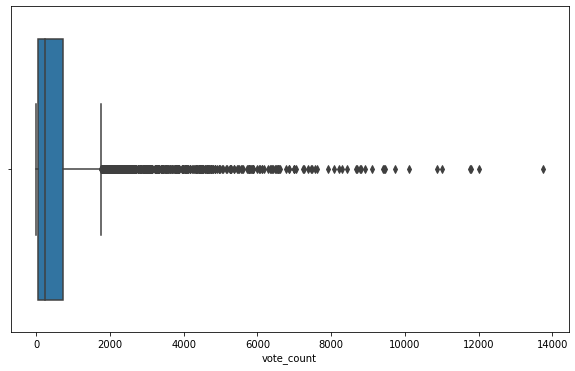

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(df['vote_count'])

In [5]:
threshold = df['vote_count'].quantile(.9)
# how does a higher quantile affect the algo
# M = df['vote_count'].quantile(.95)
threshold

1838.4000000000015

In [6]:
data = df[df['vote_count'] > threshold]

In [7]:
def avg_weighted_score(x, m=threshold, C=C):
  V = x["vote_count"]
  R = x["vote_average"]
  return ((R*V) + (C*m)) / ( V + m)
    

In [8]:
# row = df.iloc[0:1, :]
# weight = avg_weighted_score(row)
# print(weight)

In [9]:
data['weighted_score'] = data.apply(avg_weighted_score, axis=1)

sorted_data = data.sort_values('weighted_score', ascending=False)

/var/folders/9q/cz9d07g96xx8k2mkv03pcz1r0000gn/T/ipykernel_78376/1605856273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weighted_score'] = data.apply(avg_weighted_score, axis=1)


In [10]:
sorted_data.head(3)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_score
1881,1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mischief. Mayhem. Soap.,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020


In [11]:
sorted_data[['original_title', 'weighted_score', 'tagline', 'popularity']].head(5)

,original_title,weighted_score,tagline,popularity
1881,The Shawshank Redemption,8.059258,Fear can hold you prisoner. Hope can set you f...,136.747729
662,Fight Club,7.939256,Mischief. Mayhem. Soap.,146.757391
65,The Dark Knight,7.920020,Why So Serious?,187.322927
3232,Pulp Fiction,7.904645,Just because you are a character doesn't mean ...,121.463076
96,Inception,7.863239,Your mind is the scene of the crime.,167.583710


Text(0, 0.5, 'Movie title')

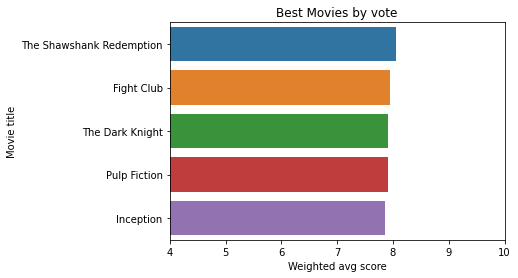

In [12]:
sns.barplot(x=sorted_data['weighted_score'].head(5), y=sorted_data['original_title'].head(5), data=sorted_data)
plt.xlim(4, 10)
plt.title('Best Movies by vote')
plt.xlabel('Weighted avg score')
plt.ylabel('Movie title')

In [13]:
data.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_score'],
      dtype='object')

In [14]:
popularity = data[['original_title', 'weighted_score', 'popularity', 'vote_count', 'vote_average']].sort_values(["popularity"], ascending=False)

In [15]:
popularity

,original_title,weighted_score,popularity,vote_count,vote_average
546,Minions,6.311706,875.581305,4571,6.4
95,Interstellar,7.809479,724.247784,10867,8.1
788,Deadpool,7.212652,514.569956,10995,7.4
94,Guardians of the Galaxy,7.613005,481.098624,9742,7.9
127,Mad Max: Fury Road,7.019214,434.278564,9427,7.2
...,...,...,...,...,...
101,X-Men: First Class,6.836047,3.195174,5181,7.1
203,X2,6.556517,2.871739,3506,6.8
508,The Lost World: Jurassic Park,6.154170,2.502487,2487,6.2
2511,Home Alone,6.664295,2.186927,2414,7.1


In [16]:
popularity.columns

Index(['original_title', 'weighted_score', 'popularity', 'vote_count',
       'vote_average'],
      dtype='object')

In [17]:
pop = popularity[['original_title', 'weighted_score', 'popularity', 'vote_count', 'vote_average']]

Text(0, 0.5, 'popularity')

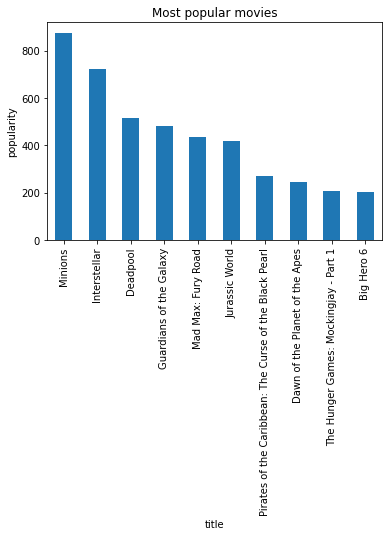

In [18]:
pop.set_index('original_title')['popularity'].nlargest(10).plot(kind='bar')
plt.title('Most popular movies')
plt.xlabel('title')
plt.ylabel('popularity')

In [19]:
pop

,original_title,weighted_score,popularity,vote_count,vote_average
546,Minions,6.311706,875.581305,4571,6.4
95,Interstellar,7.809479,724.247784,10867,8.1
788,Deadpool,7.212652,514.569956,10995,7.4
94,Guardians of the Galaxy,7.613005,481.098624,9742,7.9
127,Mad Max: Fury Road,7.019214,434.278564,9427,7.2
...,...,...,...,...,...
101,X-Men: First Class,6.836047,3.195174,5181,7.1
203,X2,6.556517,2.871739,3506,6.8
508,The Lost World: Jurassic Park,6.154170,2.502487,2487,6.2
2511,Home Alone,6.664295,2.186927,2414,7.1


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
popularity

,original_title,weighted_score,popularity,vote_count,vote_average
546,Minions,6.311706,875.581305,4571,6.4
95,Interstellar,7.809479,724.247784,10867,8.1
788,Deadpool,7.212652,514.569956,10995,7.4
94,Guardians of the Galaxy,7.613005,481.098624,9742,7.9
127,Mad Max: Fury Road,7.019214,434.278564,9427,7.2
...,...,...,...,...,...
101,X-Men: First Class,6.836047,3.195174,5181,7.1
203,X2,6.556517,2.871739,3506,6.8
508,The Lost World: Jurassic Park,6.154170,2.502487,2487,6.2
2511,Home Alone,6.664295,2.186927,2414,7.1


In [22]:
scaling = MinMaxScaler()
popularity[['weighted_score', 'popularity']]

,weighted_score,popularity
546,6.311706,875.581305
95,7.809479,724.247784
788,7.212652,514.569956
94,7.613005,481.098624
127,7.019214,434.278564
...,...,...
101,6.836047,3.195174
203,6.556517,2.871739
508,6.154170,2.502487
2511,6.664295,2.186927


In [23]:
df_scaled = scaling.fit_transform(popularity[['weighted_score', 'popularity']])

In [24]:
popularity[['weighted_avg_scaled', 'popularity_scaled']] = df_scaled

In [25]:
popularity.head(2)

,original_title,weighted_score,popularity,vote_count,vote_average,weighted_avg_scaled,popularity_scaled
546,Minions,6.311706,875.581305,4571,6.4,0.398128,1.000000
95,Interstellar,7.809479,724.247784,10867,8.1,0.913974,0.826794


In [26]:
popularity['score_mix'] = (popularity['weighted_avg_scaled'] * 0.5) + (popularity['popularity_scaled'] * 0.5)

In [27]:
popularity

,original_title,weighted_score,popularity,vote_count,vote_average,weighted_avg_scaled,popularity_scaled,score_mix
546,Minions,6.311706,875.581305,4571,6.4,0.398128,1.000000,0.699064
95,Interstellar,7.809479,724.247784,10867,8.1,0.913974,0.826794,0.870384
788,Deadpool,7.212652,514.569956,10995,7.4,0.708422,0.586812,0.647617
94,Guardians of the Galaxy,7.613005,481.098624,9742,7.9,0.846307,0.548503,0.697405
127,Mad Max: Fury Road,7.019214,434.278564,9427,7.2,0.641800,0.494916,0.568358
...,...,...,...,...,...,...,...,...
101,X-Men: First Class,6.836047,3.195174,5181,7.1,0.578716,0.001529,0.290122
203,X2,6.556517,2.871739,3506,6.8,0.482443,0.001159,0.241801
508,The Lost World: Jurassic Park,6.154170,2.502487,2487,6.2,0.343871,0.000736,0.172304
2511,Home Alone,6.664295,2.186927,2414,7.1,0.519563,0.000375,0.259969


In [28]:
popularity.shape

(481, 8)

In [29]:
popularity_sorted = popularity.sort_values('score_mix', ascending=False)

In [30]:
popularity[0:10]

,original_title,weighted_score,popularity,vote_count,vote_average,weighted_avg_scaled,popularity_scaled,score_mix
546,Minions,6.311706,875.581305,4571,6.4,0.398128,1.000000,0.699064
95,Interstellar,7.809479,724.247784,10867,8.1,0.913974,0.826794,0.870384
788,Deadpool,7.212652,514.569956,10995,7.4,0.708422,0.586812,0.647617
94,Guardians of the Galaxy,7.613005,481.098624,9742,7.9,0.846307,0.548503,0.697405
127,Mad Max: Fury Road,7.019214,434.278564,9427,7.2,0.641800,0.494916,0.568358
28,Jurassic World,6.428598,418.708552,8662,6.5,0.438387,0.477096,0.457741
199,Pirates of the Caribbean: The Curse of the Bla...,7.206672,271.972889,6985,7.5,0.706362,0.309153,0.507757
82,Dawn of the Planet of the Apes,6.944634,243.791743,4410,7.3,0.616114,0.276899,0.446506
200,The Hunger Games: Mockingjay - Part 1,6.474220,206.227151,5584,6.6,0.454099,0.233905,0.344002
88,Big Hero 6,7.406232,203.734590,6135,7.8,0.775092,0.231052,0.503072


In [31]:
import plotly.express as px

In [69]:
px.bar(x=popularity_sorted[0:10]['original_title'], y=popularity_sorted[0:10]['score_mix'])